In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_rcv1
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import k_means

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_ks(path_to_ks):
    ks = pd.read_csv(path_to_ks, names=['k'], dtype=np.int32)
    return ks['k'].tolist()

In [3]:
def check_output(output, y):
    assert type(output) == np.ndarray
    assert output.ndim == 1
    assert output.shape[0] == y.shape[0]

In [ ]:
# Adrien Cogny - Assignment 1 for Data Science in the Wild at Cornell Tech
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_rcv1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

def load_labels(pathtoLabels):
    DF = pd.read_csv(pathtoLabels,header=None);
    return DF[0];

def load_training_data():
    dataSet = fetch_rcv1(subset='train')

    return dataSet.data, dataSet.target, dataSet.sample_id

def load_validation_data(validationData):

    # This is taken from the homework FAQ and modified slightly.
    test_data = fetch_rcv1(subset='test')
    ids = pd.read_csv(validationData)
    mask = np.isin(test_data.sample_id, ids)
    validation_data = test_data.data[mask]
    validation_target = test_data.target[mask]
    return validation_data, validation_target, test_data

class CS5304KNNClassifier():

    numNeighbors = 5;

    classifier = None;
    # def __init__(self,):
    #     # Initialization of the knn classifier should be done here
    #     self.classifier = NearestNeighbors(n_neighbors=self.numNeighbors);        
    #     return
    def __init__(self,n_neighbors = None):
        if (type(n_neighbors) == int):
            self.numNeighbors = n_neighbors;
        self.classifier = KNeighborsClassifier(n_neighbors=self.numNeighbors,algorithm='brute');        

    def train(self,fitX, fitY):
        #in the fitX, fitY sparce matrix, the index of the element is in indptr

        fitXIndexElem = fitX.indptr;
        fitYIndexElem = fitY.indptr;

        fitXelemDF = pd.Series(data=fitX.indptr[1:])
        fitYelemDF = pd.Series(data=fitY.indptr[1:])
        # print(fitXelemDF);
        # print(fitYelemDF);


        dataArray = fitX.toarray()
        dataDF = pd.DataFrame(data=dataArray,index=fitXelemDF)
        # print(dataDF)

        targetArray = fitY.toarray()
        targetDF = pd.DataFrame(data=targetArray,index=fitYelemDF)
        # print(targetDF)

        self.classifier.fit(dataDF,targetDF);
        return

    def predict(self,predictX):
        dataArray = predictX.toarray()
        dataDF = pd.DataFrame(data=dataArray)
        return self.classifier.predict(predictX)

    def score(self,data,labels):
        dataArray = data.toarray()
        dataDF = pd.DataFrame(data=dataArray)

        predictArray = labels.toarray()
        labelsDF = pd.DataFrame(data=predictArray)

        return self.classifier.score(dataDF,labelsDF)



class CS5304NBClassifier():

    classifier = None;
    def __init__(self, alphanew = 1.25):
        self.classifier = BernoulliNB(alpha = alphanew)
        return
    
    def train(self,fitX, fitY):
        
        self.classifier.fit(fitX,fitY.todense())
        return

    def predict(self,predictX):
        dataArray = predictX.toarray()
        dataDF = pd.DataFrame(data=dataArray)
        return self.classifier.predict(predictX)

    def score(self,data,labels):
        return self.classifier.score(data,labels.todense())

class CS5304KMeansClassifier():
    classifier = None;
    centroids = None;
    numClusters = 8;
    def __init__(self, newNumClusters = 8):
        numClusters = newNumClusters
        self.classifier = KMeans(newNumClusters)
        return
    
    def train(self,fitX, fitY):
        self.centroids = k_means(fitX,n_clusters=self.numClusters)
        print(self.centroids)
#         self.classifier.fit(fitX,fitY)
        return 

In [5]:
path_to_labels = "labels.txt"
path_to_ids = "validation.txt"
path_to_ks = "ks.txt"
label = 33

In [6]:
ks = load_ks(path_to_ks)
labels = load_labels(path_to_labels)
train_data, train_target, _ = load_training_data()
eval_data, eval_target, _ = load_validation_data(path_to_ids)

In [7]:
print(labels)

0      4
1      5
2      7
3     33
4     59
5     70
6     83
7     95
8     98
9    102
Name: 0, dtype: int64


# KNN Classifier Testing

In [8]:
scoresDF = pd.DataFrame(index=[i for i in range(1,21)],columns=[label for label in labels])
for label in labels:    
    print(label)
    # Grade Ex. 1a
    for k in range(1,21):
#         print(k)
        limit = 1000
#         k = 15 # change this
        knn = CS5304KNNClassifier(n_neighbors=k)
        knn.train(train_data[:limit], train_target[:limit][:, label])
        output = knn.predict(eval_data[:limit])
        check_output(output,eval_target[:limit])
    #     print(knn.score(eval_data[:limit],eval_target[:limit][:, label]))
        scoresDF[label][k] = knn.score(eval_data[:limit],eval_target[:limit][:, label])

scoresDF.head()

4


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


5
7
33
59
70
83
95
98
102


,4,5,7,33,59,70,83,95,98,102
1,0.829,0.877,0.899,0.783,0.835,0.849,0.922,0.928,0.931,0.851
2,0.887,0.943,0.917,0.781,0.88,0.851,0.942,0.963,0.955,0.894
3,0.882,0.93,0.921,0.805,0.868,0.873,0.937,0.953,0.958,0.882
4,0.884,0.94,0.914,0.789,0.889,0.879,0.942,0.965,0.957,0.899
5,0.885,0.924,0.918,0.8,0.885,0.896,0.948,0.955,0.955,0.894


In [10]:
scoresDF.head(20)
scoresDF.to_csv('scores_matrix')

In [12]:
scoresDF.max()

4      0.908
5      0.945
7      0.921
33     0.827
59     0.899
70     0.909
83     0.950
95     0.981
98     0.960
102    0.929
dtype: float64

In [13]:
scoresDF.head(20)

,4,5,7,33,59,70,83,95,98,102
1,0.829,0.877,0.899,0.783,0.835,0.849,0.922,0.928,0.931,0.851
2,0.887,0.943,0.917,0.781,0.88,0.851,0.942,0.963,0.955,0.894
3,0.882,0.93,0.921,0.805,0.868,0.873,0.937,0.953,0.958,0.882
4,0.884,0.94,0.914,0.789,0.889,0.879,0.942,0.965,0.957,0.899
5,0.885,0.924,0.918,0.8,0.885,0.896,0.948,0.955,0.955,0.894
6,0.891,0.938,0.916,0.786,0.89,0.885,0.942,0.977,0.957,0.914
7,0.89,0.926,0.917,0.808,0.888,0.901,0.95,0.973,0.957,0.902
8,0.893,0.94,0.912,0.803,0.893,0.897,0.948,0.969,0.949,0.91
9,0.895,0.93,0.913,0.818,0.892,0.908,0.95,0.972,0.956,0.905
10,0.895,0.94,0.911,0.806,0.893,0.903,0.947,0.971,0.956,0.914


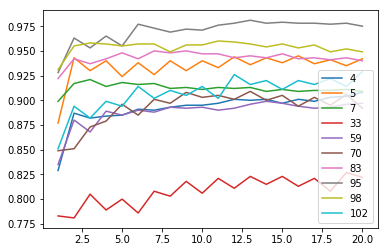

In [14]:
scoresDF.plot()

# NB Classification Testing

In [9]:
# print(label)
# # nb = CS5304NBClassifier()
# # nb.train(train_data, train_target[:, label])
# # output = nb.predict(eval_data)
# # check_output(output,eval_target)
# # print(nb.score(eval_data,eval_target[:, label]))

scoresNBDF = pd.DataFrame(index=[label for label in labels],columns=[i for i in np.arange(0.1, 2.0, 0.1)])
for label in labels:
    print(label)
    for alpha in np.arange(0.1, 2.0, 0.1):  
#         print(alpha)
        nb = CS5304NBClassifier(alpha)
        nb.train(train_data, train_target[:, label])
        output = nb.predict(eval_data)
        check_output(output,eval_target)
    #     print(nb.score(eval_data,eval_target[:, label]))
        scoresNBDF[alpha][label] = nb.score(eval_data,eval_target[:, label])
scoresNBDF.head()

4


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
7
33
59
70
83
95
98
102


,0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7000000000000001,0.8,0.9,1.0,1.1,1.2000000000000002,1.3000000000000003,1.4000000000000001,1.5000000000000002,1.6,1.7000000000000002,1.8000000000000003,1.9000000000000001
4,0.79758,0.793579,0.791479,0.790579,0.791879,0.794679,0.79848,0.80228,0.806381,0.810881,0.815782,0.820982,0.825383,0.832183,0.837884,0.843884,0.851385,0.857086,0.861986
5,0.827983,0.825483,0.827283,0.831983,0.839984,0.847585,0.856786,0.864586,0.873887,0.882388,0.893189,0.90419,0.913691,0.925193,0.935894,0.941394,0.945695,0.948995,0.950695
7,0.768277,0.773477,0.786679,0.80298,0.821682,0.842484,0.866187,0.888889,0.909091,0.921192,0.930293,0.933293,0.933193,0.932693,0.929993,0.925493,0.919892,0.916592,0.913491
33,0.80328,0.80078,0.79868,0.79728,0.79698,0.79618,0.79538,0.794879,0.793779,0.793079,0.792479,0.792079,0.791979,0.791579,0.791579,0.791479,0.790779,0.790379,0.790079
59,0.906091,0.909491,0.913291,0.913891,0.914591,0.914391,0.913991,0.913491,0.911991,0.911491,0.909391,0.908391,0.907391,0.905391,0.90399,0.90229,0.90179,0.90059,0.90029


In [10]:
scoresNBDF.head(20)

,0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7000000000000001,0.8,0.9,1.0,1.1,1.2000000000000002,1.3000000000000003,1.4000000000000001,1.5000000000000002,1.6,1.7000000000000002,1.8000000000000003,1.9000000000000001
4,0.79758,0.793579,0.791479,0.790579,0.791879,0.794679,0.79848,0.80228,0.806381,0.810881,0.815782,0.820982,0.825383,0.832183,0.837884,0.843884,0.851385,0.857086,0.861986
5,0.827983,0.825483,0.827283,0.831983,0.839984,0.847585,0.856786,0.864586,0.873887,0.882388,0.893189,0.90419,0.913691,0.925193,0.935894,0.941394,0.945695,0.948995,0.950695
7,0.768277,0.773477,0.786679,0.80298,0.821682,0.842484,0.866187,0.888889,0.909091,0.921192,0.930293,0.933293,0.933193,0.932693,0.929993,0.925493,0.919892,0.916592,0.913491
33,0.80328,0.80078,0.79868,0.79728,0.79698,0.79618,0.79538,0.794879,0.793779,0.793079,0.792479,0.792079,0.791979,0.791579,0.791579,0.791479,0.790779,0.790379,0.790079
59,0.906091,0.909491,0.913291,0.913891,0.914591,0.914391,0.913991,0.913491,0.911991,0.911491,0.909391,0.908391,0.907391,0.905391,0.90399,0.90229,0.90179,0.90059,0.90029
70,0.905091,0.90389,0.90249,0.90219,0.90139,0.90099,0.90069,0.90049,0.89969,0.89909,0.89879,0.89839,0.89769,0.89789,0.89739,0.89669,0.89619,0.89579,0.89539
83,0.907191,0.90329,0.90199,0.90119,0.90089,0.90069,0.90199,0.90269,0.90299,0.90329,0.90399,0.905591,0.907891,0.909391,0.910391,0.912691,0.914191,0.914891,0.915492
95,0.918292,0.921692,0.929493,0.935594,0.942894,0.950195,0.954795,0.959796,0.961196,0.963396,0.961396,0.960496,0.959196,0.954695,0.953095,0.951495,0.948995,0.946295,0.944894
98,0.941594,0.944894,0.947795,0.953095,0.957296,0.961796,0.965597,0.968497,0.970997,0.973497,0.975298,0.976398,0.977498,0.977698,0.977798,0.977498,0.976298,0.975098,0.973097
102,0.879888,0.880588,0.882388,0.885389,0.887889,0.890689,0.893489,0.89619,0.89919,0.90179,0.90459,0.907791,0.909291,0.911991,0.913791,0.915992,0.919192,0.921892,0.924292


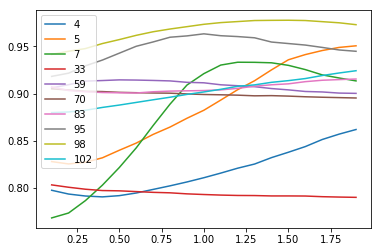

In [14]:
scoresNBDF.T.plot()

# Kmeans Clustering

In [ ]:
kmeans = CS5304KMeansClassifier()
kmeans.train(train_data, train_target[:, label])
# output = kmeans.predict(eval_data)
# check_output(output,eval_target)